In [51]:
import time
import os
import sys
sys.path.append("../include")
sys.path.append("../src")

import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as ax
import pandas            as pd

from   math              import sqrt
from   scipy.io          import savemat, loadmat
from   scipy.stats       import iqr
from   scipy.integrate   import simps
from   pearson           import logpearson, dlogpearson
from   load_dataset      import load_data

import numpy as np
import matplotlib.pyplot as ax

import main


(8, 17)


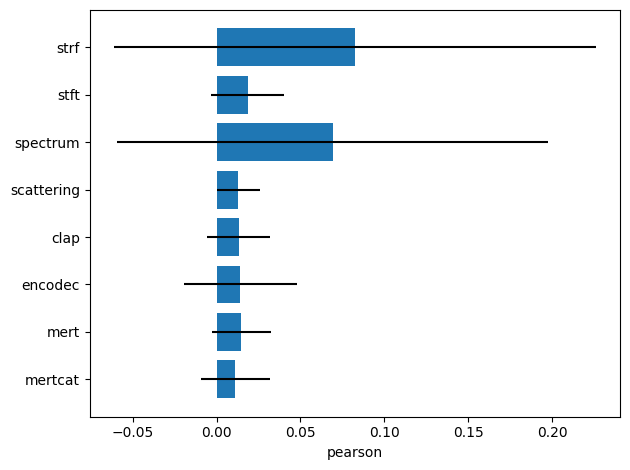

In [52]:
n_dataset = len(main.experiment._plan.dataset)
n_embedding = len(main.experiment._plan.embedding)

data = np.zeros((n_embedding, n_dataset))
for e_n, e in enumerate(main.experiment._plan.embedding):
  selector = 'embedding='+e+',method=direct'
  (d, settings, header) = main.experiment.get_output(
  output = 'pearson',
  selector = selector,
  )
  data[e_n, :] = d

settings = main.experiment._plan.embedding
settingIds = np.arange(len(settings))

print(data.shape)

fig, ax = ax.subplots()
ax.barh(settingIds, np.mean(data, axis=1), xerr=np.std(data, axis=1), align='center')
ax.set_yticks(settingIds)
ax.set_yticklabels(settings)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('pearson')

fig.tight_layout()
plt.savefig('metric_display.png')

# data = data['accuracy']
# settings = settings['accuracy']
# header = header['accuracy']



In [53]:
method = 'learn'
embedding = 'mertcat' 
warm = 0

p=np.zeros((len(main.experiment._plan.dataset), 13))
ws = np.zeros((len(main.experiment._plan.dataset), 13*768))
for d, dataset in enumerate(main.experiment._plan.dataset):
    selector = 'method='+method+',embedding='+embedding+',dataset='+dataset+',warm='+str(warm)

    (data, settings, header) = main.experiment.get_output(
    output = 'weight',
    selector = selector,
    )
    w = data[0]
    ws[d, :] = w
    r,D,ratings   = load_data(dataset,embedding, '../')
    for e in range(13):
      p[d, e] = (-logpearson(w[e*768:(e+1)*768],r[e*768:(e+1)*768, :],ratings))**2


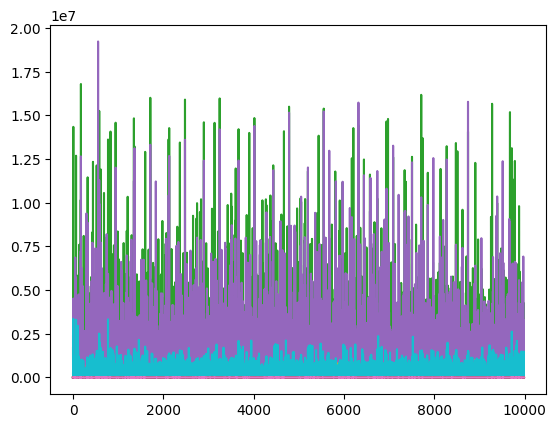

In [56]:
fig, ax = plt.subplots()
ax.plot((ws.T))
plt.show()
# ax.vlines(np.arange(14)*768, 0, 1, 'r')
# ax.set_xticks(np.arange(14)*768)
# ax.set_xticklabels(np.arange(14))
# ax.set_xlabel('Embedding index')
# ax.set_ylabel('log normalized weight')

(13,)
(13,)


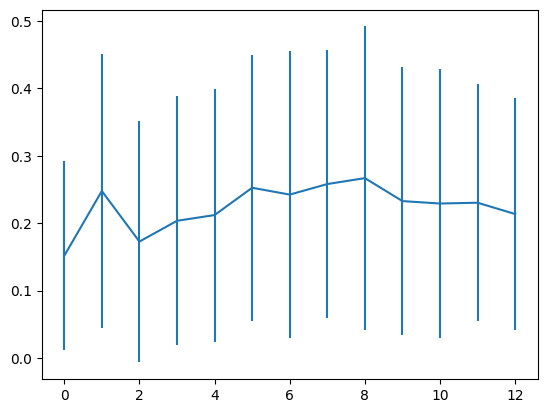

In [57]:
fig, ax = plt.subplots()
x = np.arange(0, 13)
print(x.shape)
print(np.mean(p, axis=0).shape)
ax.errorbar(x, np.mean(p, axis=0), yerr=np.std(p, axis=0))
plt.show()

In [40]:
p=np.zeros(13)
for e in range(13):
    p[e] = (-logpearson(w[e*768:(e+1)*768],r[e*768:(e+1)*768, :],d))**2
    sw = w[e*768:(e+1)*768]

/Users/lagrange/experiments/timbre-metric-learning/doce/../src/pearson.py:28: RuntimeWarning: invalid value encountered in scalar divide
  ld = (ld - np.mean(ld))/np.std(ld)


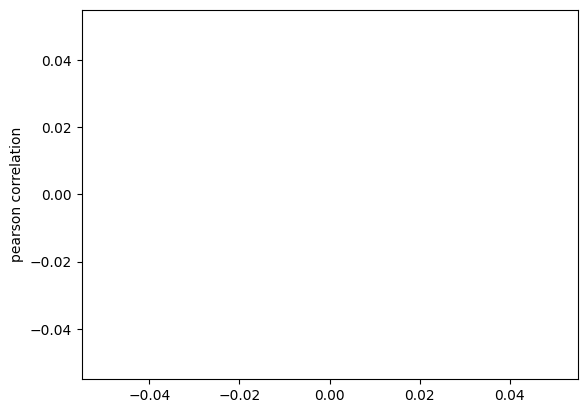

In [41]:
fig, ax = plt.subplots()
ax.plot(p)
ax.set_xlabel('number of non one normalized weights')
ax.set_ylabel('pearson correlation')
plt.show()

In [ ]:
print(main.experiment.plans())

['plan']
